In [3]:
import pandas as pd

# Read the Excel file
excel_file = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\Met City\RStudio/Cleared_Hourly_Varibales_2.xlsx'
df = pd.read_excel(excel_file)

# Convert 'DateTime' column to datetime data type
#df['DateTime'] = pd.to_datetime(df['DateTime'])

# Set 'DateTime' column as the index
df.set_index('DateTime', inplace=True)

# Resample data to daily frequency and calculate mean
daily_mean = df['bulk_Hl_10m_RunningHourlyMean'].resample('D').mean()

# Create a new DataFrame with 'Date' and 'Daily_Hl' columns
daily_data = pd.DataFrame({'Date': daily_mean.index.date, 'Daily_Hl': daily_mean.values})

# Define the file path for saving the CSV file
csv_file_path = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\Met City\RStudio\Daily_Hl.csv'

# Save data to a CSV file
daily_data.to_csv(csv_file_path, index=False)


In [5]:
import pandas as pd

# Read the 'Daily_Hl.csv' file
daily_hl_file = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\Met City\RStudio\Daily_Hl.csv'
daily_hl_df = pd.read_csv(daily_hl_file)

# Read the 'CiASOM_SLF_Corrected.xlsx' file
snow_file = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\CiASOM_SLF_Corrected.xlsx'
snow_df = pd.read_excel(snow_file, sheet_name='Surface_Snow')

# Convert 'Date' column to datetime data type
daily_hl_df['Date'] = pd.to_datetime(daily_hl_df['Date'])
snow_df['Date'] = pd.to_datetime(snow_df['Date'])

# Merge the two datasets based on the 'Date' column
merged_df = pd.merge(snow_df, daily_hl_df, on='Date', how='inner')

# Select the desired columns
selected_columns = ['Date', 'd18O', 'dD', 'd_excess', 'Daily_Hl']
merged_df = merged_df[selected_columns]

# Define the file path for saving the new CSV file
output_file = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\Snow_Hl.csv'

# Save the merged dataset to a new CSV file
merged_df.to_csv(output_file, index=False)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def calculate_snow_isotopes(vapor_d18O, vapor_dD, temperature_vapor, relative_humidity, d18O_source, dD_source, lambda_value):
    # Convert temperatures from Celsius to Kelvin
    temperature_vapor += 273.15

    # Calculate equilibrium fractionation factor
    alpha_e = np.exp((1000 * lambda_value) / (8.314 * (1 / 273.15 - 1 / temperature_vapor)))

    # Calculate δ¹⁸O and δD values of snow
    d18O_snow = (vapor_d18O - d18O_source) / alpha_e + d18O_source
    dD_snow = (vapor_dD - dD_source) / alpha_e + dD_source

    return d18O_snow, dD_snow

# Read the vapor data from Excel
vapor_file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\TS Vapour and Snow\Vap_All.xlsx"
vapor_df = pd.read_excel(vapor_file_path)

# Extract vapor data columns
vapor_d18O = vapor_df['d18O']
vapor_dD = vapor_df['d-excess']

# Read air temperature and relative humidity data
met_city_file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\Met City\RStudio\Cleared_Hourly_Varibales_2.xlsx"
met_city_df = pd.read_excel(met_city_file_path)
temperature_vapor = met_city_df['temp_2m_RunningHourlyMean']
relative_humidity = met_city_df['rh_2m_RunningHourlyMean']

# Other input parameters
d18O_source = -10.0  # Example source δ¹⁸O value
dD_source = -90.0  # Example source δD value
lambda_value = 27.0  # Example slope value for δ¹⁸O

# Calculate snow isotopes
d18O_snow, dD_snow = calculate_snow_isotopes(vapor_d18O, vapor_dD, temperature_vapor, relative_humidity, d18O_source, dD_source, lambda_value)

# Create a time series plot for d18O
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(vapor_df['DateTime'], d18O_snow, color='blue', label='Snow δ¹⁸O')
ax.set_xlabel('Date')
ax.set_ylabel('δ¹⁸O')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.xticks(rotation=45)
plt.title('Snow δ¹⁸O Time Series')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()



In [10]:
import pandas as pd

# Define file paths
input_file = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF\Vap_All.xlsx'
output_folder = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF'
below_zero_data_file = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF\LE_below_zero_data.csv'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(input_file)

# Read the 'DateTime' and 'bulk_Hl_10m_RunningHourlyMean' columns from LE_below_zero_data.csv
below_zero_data = pd.read_csv(below_zero_data_file)
below_zero_datetime = pd.to_datetime(below_zero_data['DateTime_adjusted'])
below_zero_bulk_Hl = below_zero_data['bulk_Hl_10m_RunningHourlyMean']

# Convert 'DateTime' column in df to datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Filter data based on 'DateTime' column matching 'DateTime_adjusted' from LE_below_zero_data.csv
below_zero_filtered_df = df[df['DateTime'].isin(below_zero_datetime)].copy()

# Add 'bulk_Hl_10m_RunningHourlyMean' column from LE_below_zero_data.csv to the filtered DataFrame
below_zero_filtered_df.loc[:, 'bulk_Hl_10m_RunningHourlyMean'] = below_zero_bulk_Hl.values

# Save filtered data as a separate CSV file
below_zero_filtered_df.to_csv(f"{output_folder}/LE_below_zero_Vap.csv", index=False)


In [11]:
import pandas as pd

# Define file paths
input_file = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF\Vap_All.xlsx'
output_folder = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF'
below_zero_data_file = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF\LE_equal_or_above_zero_data.csv'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(input_file)

# Read the 'DateTime' and 'bulk_Hl_10m_RunningHourlyMean' columns from LE_below_zero_data.csv
below_zero_data = pd.read_csv(below_zero_data_file)
below_zero_datetime = pd.to_datetime(below_zero_data['DateTime_adjusted'])
below_zero_bulk_Hl = below_zero_data['bulk_Hl_10m_RunningHourlyMean']

# Convert 'DateTime' column in df to datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Filter data based on 'DateTime' column matching 'DateTime_adjusted' from LE_below_zero_data.csv
below_zero_filtered_df = df[df['DateTime'].isin(below_zero_datetime)].copy()

# Add 'bulk_Hl_10m_RunningHourlyMean' column from LE_below_zero_data.csv to the filtered DataFrame
below_zero_filtered_df.loc[:, 'bulk_Hl_10m_RunningHourlyMean'] = below_zero_bulk_Hl.values

# Save filtered data as a separate CSV file
below_zero_filtered_df.to_csv(f"{output_folder}/LE_equal_or_above_zero_Vap.csv", index=False)

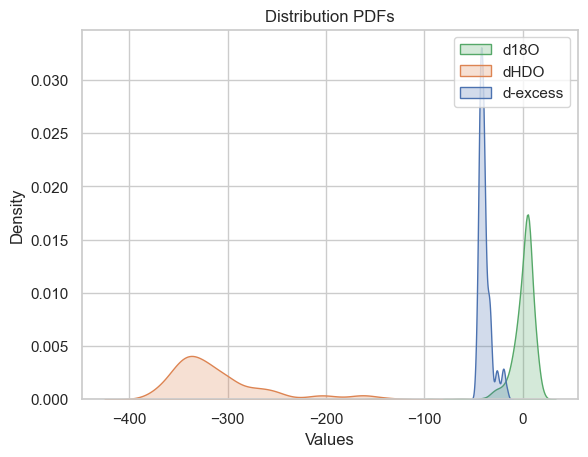

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define file path
data_file = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF\LE_below_zero_Vap.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(data_file)

# Select the columns of interest
columns_of_interest = ['d18O', 'dHDO', 'd-excess']

# Plot distribution PDFs using seaborn
sns.set(style='whitegrid')
sns.kdeplot(data=df[columns_of_interest], fill=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend(columns_of_interest)
plt.title('Distribution PDFs')
plt.show()


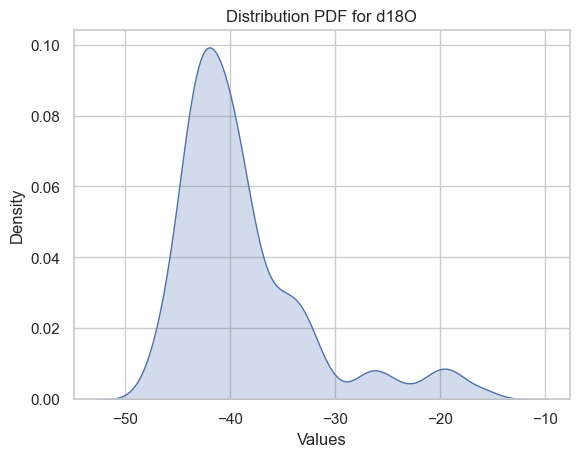

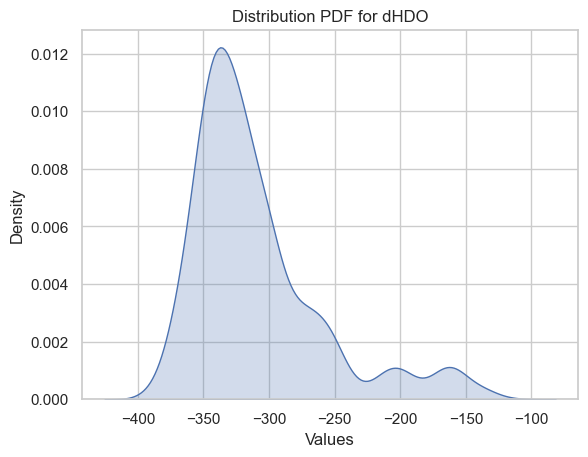

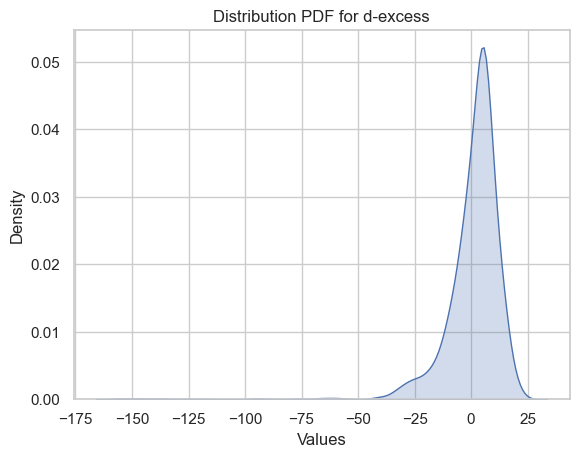

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define file path
data_file = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF\LE_below_zero_Vap.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(data_file)

# Select the columns of interest
columns_of_interest = ['d18O', 'dHDO', 'd-excess']

# Plot distribution PDFs for each parameter
for column in columns_of_interest:
    sns.set(style='whitegrid')
    sns.kdeplot(data=df[column], fill=True)
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.title(f'Distribution PDF for {column}')
    plt.show()


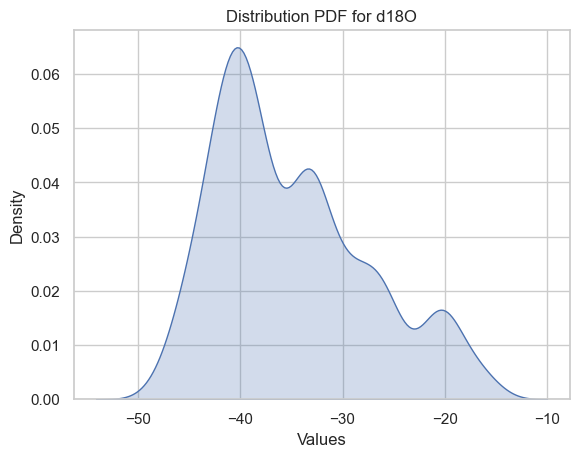

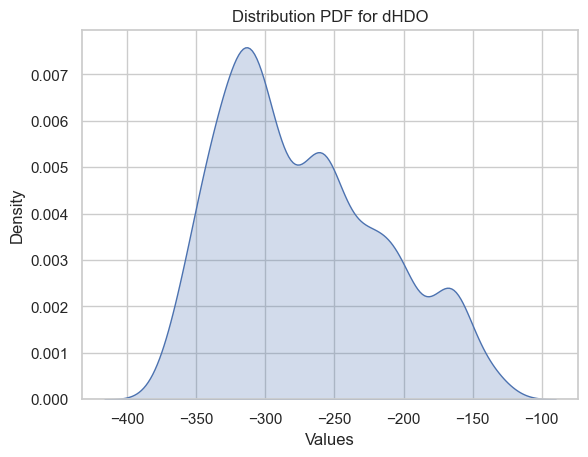

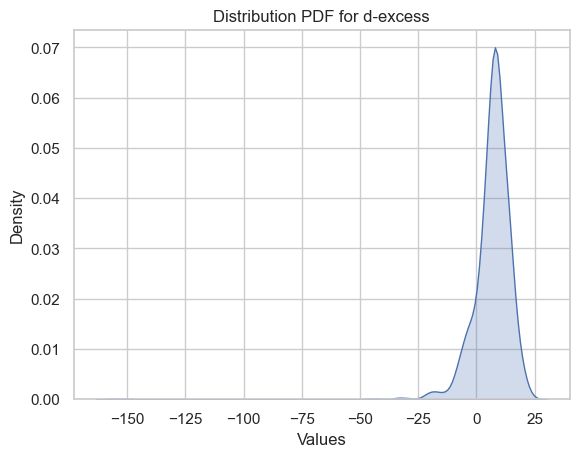

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define file path
data_file = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF\LE_equal_or_above_zero_Vap.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(data_file)

# Select the columns of interest
columns_of_interest = ['d18O', 'dHDO', 'd-excess']

# Plot distribution PDFs for each parameter
for column in columns_of_interest:
    sns.set(style='whitegrid')
    sns.kdeplot(data=df[column], fill=True)
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.title(f'Distribution PDF for {column}')
    plt.show()


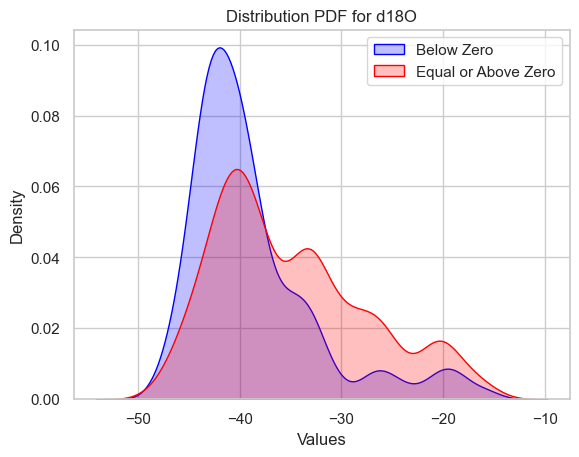

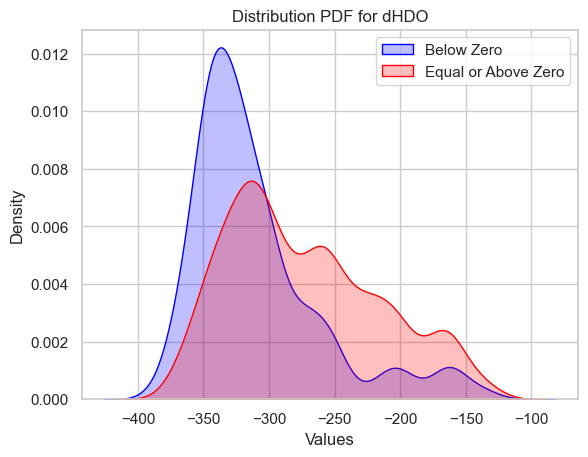

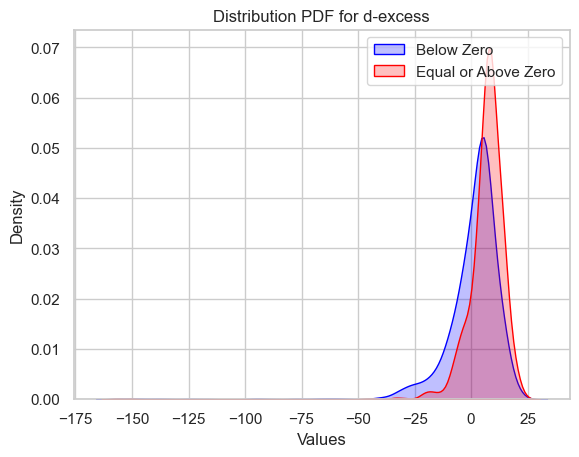

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define file paths
below_zero_data_file = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF\LE_below_zero_Vap.csv'
equal_or_above_zero_data_file = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF\LE_equal_or_above_zero_Vap.csv'

# Read the CSV files into pandas DataFrames
below_zero_data = pd.read_csv(below_zero_data_file)
equal_or_above_zero_data = pd.read_csv(equal_or_above_zero_data_file)

# Select the columns of interest
columns_of_interest = ['d18O', 'dHDO', 'd-excess']

# Plot distribution PDFs for each parameter from both datasets
sns.set(style='whitegrid')
for column in columns_of_interest:
    sns.kdeplot(data=below_zero_data[column], fill=True, color='blue', label='Below Zero')
    sns.kdeplot(data=equal_or_above_zero_data[column], fill=True, color='red', label='Equal or Above Zero')
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.title(f'Distribution PDF for {column}')
    plt.legend()
    plt.show()


<Figure size 640x480 with 0 Axes>

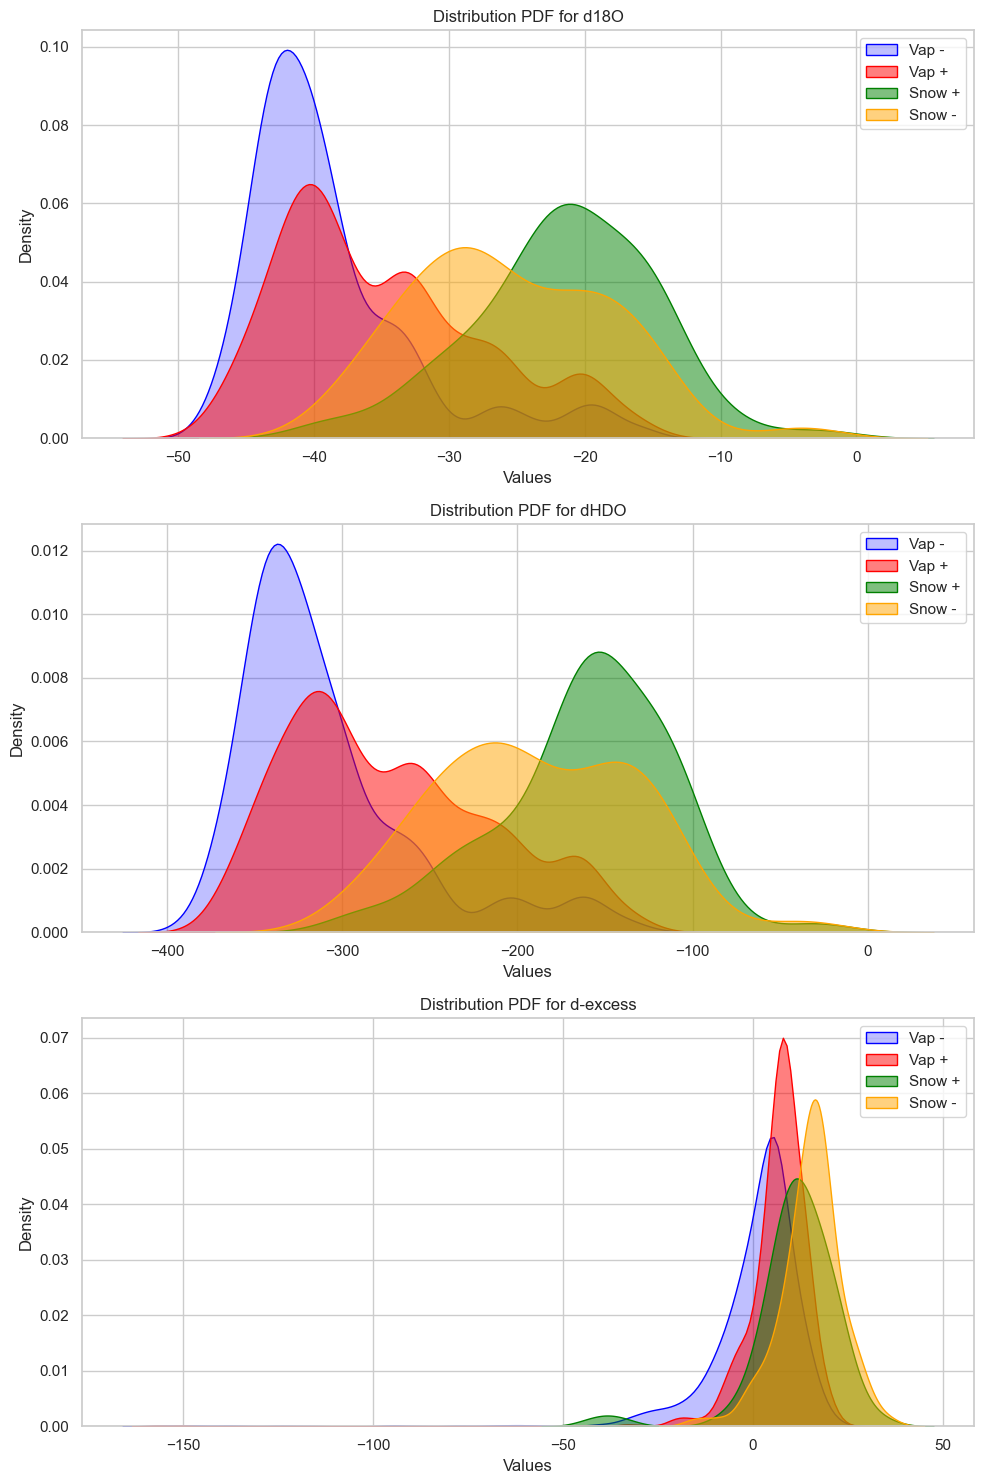

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define file paths
below_zero_data_file = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF\LE_below_zero_Vap.csv'
equal_or_above_zero_data_file = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF\LE_equal_or_above_zero_Vap.csv'
snow_hl_pos_neg_file = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF\Snow_Hl_pos_neg.xlsx'

# Read the CSV files into pandas DataFrames
below_zero_data = pd.read_csv(below_zero_data_file)
equal_or_above_zero_data = pd.read_csv(equal_or_above_zero_data_file)

# Read the Excel file with positive and negative snow data
snow_data = pd.read_excel(snow_hl_pos_neg_file, sheet_name=['Positive', 'Negative'])

# Select the columns of interest
columns_of_interest = ['d18O', 'dHDO', 'd-excess']

fig = plt.figure()

# Create a figure with three subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot distribution PDFs for each parameter from both datasets
sns.set(style='whitegrid')
for i, column in enumerate(columns_of_interest):
    ax = axes[i]
    ax.set_title(f'Distribution PDF for {column}')
    
    sns.kdeplot(data=below_zero_data[column], fill=True, color='blue', label='Vap -', ax=ax)
    sns.kdeplot(data=equal_or_above_zero_data[column], fill=True, alpha=0.5, color='red', label='Vap +', ax=ax)
    sns.kdeplot(data=snow_data['Positive'][column], fill=True, alpha=0.5, color='green', label='Snow +', ax=ax)
    sns.kdeplot(data=snow_data['Negative'][column], fill=True, alpha=0.5, color='orange', label='Snow -', ax=ax)

    ax.set_xlabel('Values')
    ax.set_ylabel('Density')
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure with 300 DPI
fig.savefig(r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF\PDFs_1307.jpg', format='jpeg', dpi=300)



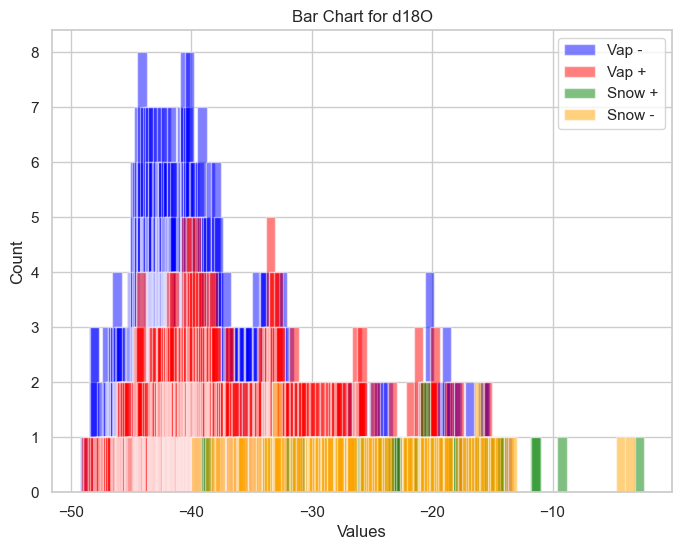

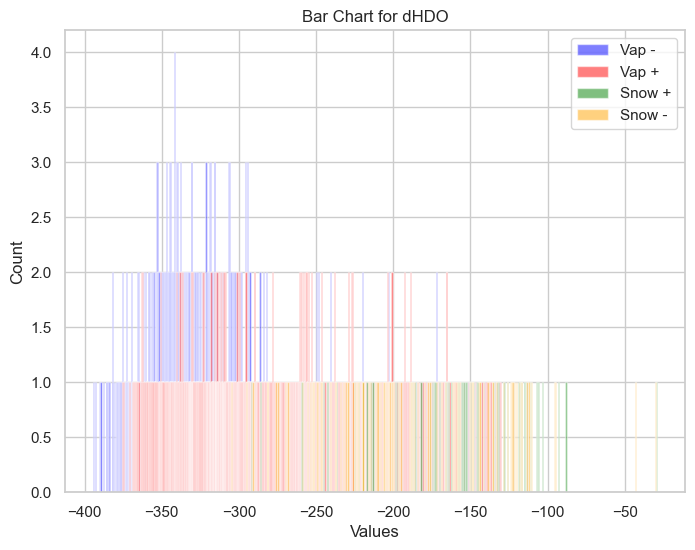

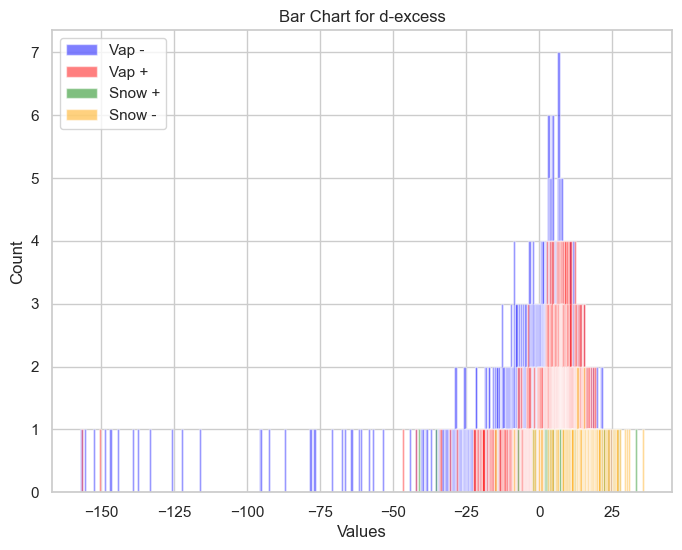

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define file paths
below_zero_data_file = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF\LE_below_zero_Vap.csv'
equal_or_above_zero_data_file = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF\LE_equal_or_above_zero_Vap.csv'
snow_hl_pos_neg_file = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF\Snow_Hl_pos_neg.xlsx'

# Read the CSV files into pandas DataFrames
below_zero_data = pd.read_csv(below_zero_data_file)
equal_or_above_zero_data = pd.read_csv(equal_or_above_zero_data_file)

# Read the Excel file with positive and negative snow data
snow_data = pd.read_excel(snow_hl_pos_neg_file, sheet_name=['Positive', 'Negative'])

# Select the columns of interest
columns_of_interest = ['d18O', 'dHDO', 'd-excess']

# Plot bar charts for each parameter from both datasets
for column in columns_of_interest:
    plt.figure(figsize=(8, 6))
    
    # Plot bar chart for below zero data
    below_zero_counts = below_zero_data[column].value_counts().sort_index()
    plt.bar(below_zero_counts.index, below_zero_counts.values, color='blue', alpha=0.5, label='Vap -')
    
    # Plot bar chart for equal or above zero data
    equal_or_above_zero_counts = equal_or_above_zero_data[column].value_counts().sort_index()
    plt.bar(equal_or_above_zero_counts.index, equal_or_above_zero_counts.values, color='red', alpha=0.5, label='Vap +')
    
    # Plot bar chart for positive snow data
    positive_snow_counts = snow_data['Positive'][column].value_counts().sort_index()
    plt.bar(positive_snow_counts.index, positive_snow_counts.values, color='green', alpha=0.5, label='Snow +')
    
    # Plot bar chart for negative snow data
    negative_snow_counts = snow_data['Negative'][column].value_counts().sort_index()
    plt.bar(negative_snow_counts.index, negative_snow_counts.values, color='orange', alpha=0.5, label='Snow -')
    
    plt.xlabel('Values')
    plt.ylabel('Count')
    plt.title(f'Bar Chart for {column}')
    plt.legend()
    plt.show()


<Figure size 640x480 with 0 Axes>

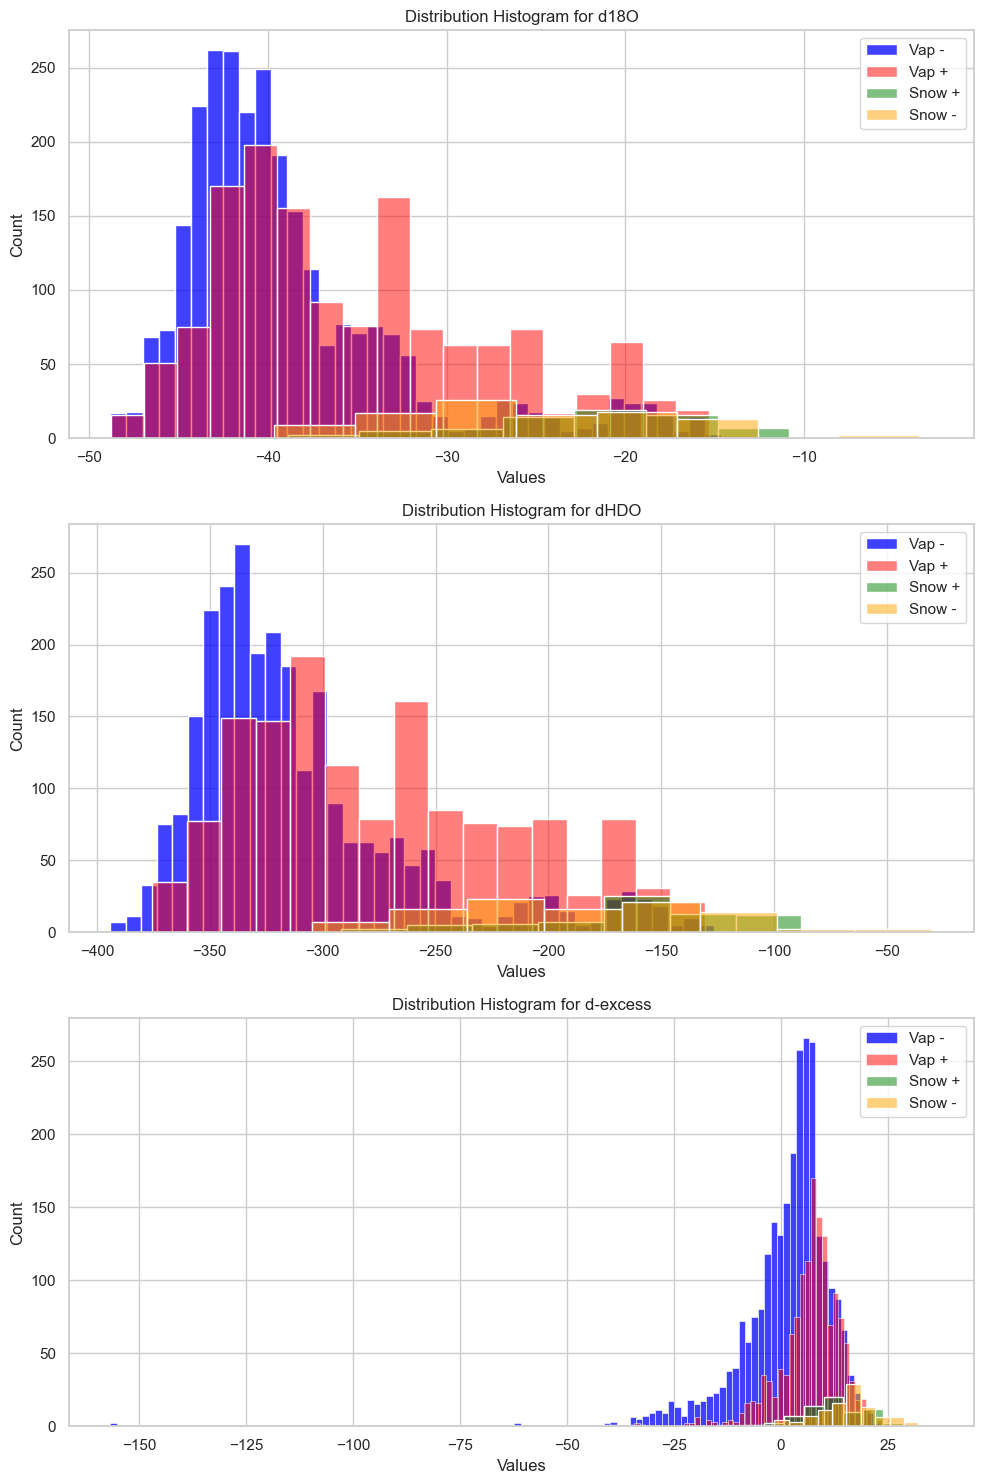

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define file paths
below_zero_data_file = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF\LE_below_zero_Vap.csv'
equal_or_above_zero_data_file = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF\LE_equal_or_above_zero_Vap.csv'
snow_hl_pos_neg_file = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF\Snow_Hl_pos_neg.xlsx'

# Read the CSV files into pandas DataFrames
below_zero_data = pd.read_csv(below_zero_data_file)
equal_or_above_zero_data = pd.read_csv(equal_or_above_zero_data_file)

# Read the Excel file with positive and negative snow data
snow_data = pd.read_excel(snow_hl_pos_neg_file, sheet_name=['Positive', 'Negative'])

# Select the columns of interest
columns_of_interest = ['d18O', 'dHDO', 'd-excess']

fig = plt.figure()

# Create a figure with three subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot distribution histograms for each parameter from both datasets
sns.set(style='whitegrid')
for i, column in enumerate(columns_of_interest):
    ax = axes[i]
    ax.set_title(f'Distribution Histogram for {column}')
    
    sns.histplot(data=below_zero_data[column], color='blue', label='Vap -', ax=ax)
    sns.histplot(data=equal_or_above_zero_data[column], color='red', alpha=0.5, label='Vap +', ax=ax)
    sns.histplot(data=snow_data['Positive'][column], color='green', alpha=0.5, label='Snow +', ax=ax)
    sns.histplot(data=snow_data['Negative'][column], color='orange', alpha=0.5, label='Snow -', ax=ax)

    ax.set_xlabel('Values')
    ax.set_ylabel('Count')
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure as a JPEG file
fig.savefig(r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF\PDFs_Count_1307.jpeg", dpi=300, bbox_inches='tight')


In [10]:
import pandas as pd

# Read the original CSV file
file_path = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF/Vap_All.csv'
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime type, specifying dayfirst=True
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Calculate daily average values
df_daily = df.groupby(df['Date'].dt.date).mean(numeric_only=True)

# Reset the index to make 'Date' a regular column
df_daily = df_daily.reset_index()

# Write the daily average values to a new CSV file
output_file_path = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF/Vap_All_daily.csv'
df_daily.to_csv(output_file_path, index=False)

print("Daily average values saved to", output_file_path)


Daily average values saved to C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF/Vap_All_daily.csv


In [17]:
import pandas as pd

# Read the original CSV file with the appropriate encoding
file_path = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF/Snow_Surface.csv'
df = pd.read_csv(file_path, encoding='latin1')

# Convert 'Date' column to datetime type, specifying the date format as 'DD/MM/YYYY'
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Calculate average daily values
df_daily = df.groupby(df['Date'].dt.date).mean(numeric_only=True)

# Reset the index to make 'Date' a regular column
df_daily = df_daily.reset_index()

# Save the daily average values to a new CSV file
output_file_path = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF/Snow_Surface_Daily.csv'
df_daily.to_csv(output_file_path, index=False)

print("Daily average values saved to", output_file_path)


Daily average values saved to C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF/Snow_Surface_Daily.csv


In [22]:
import pandas as pd

# Read 'Snow_Surface_Daily.csv'
snow_file_path = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF\Snow_Surface_Daily.csv'
df_snow = pd.read_csv(snow_file_path)
df_snow['Date'] = pd.to_datetime(df_snow['Date'])

# Read 'Vap_All_daily.csv'
vap_file_path = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF\Vap_All_daily.csv'
df_vap = pd.read_csv(vap_file_path)
df_vap['Date'] = pd.to_datetime(df_vap['Date'])

# Merge the DataFrames based on 'Date'
merged_df = pd.merge(df_vap, df_snow[['Date', 'd18O', 'dD', 'd_excess']], on='Date', how='inner')

# Save the merged DataFrame to 'Daily_All.csv'
output_file_path = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF\Daily_All.csv'
merged_df.to_csv(output_file_path, index=False)

print("Merged data saved to", output_file_path)


Merged data saved to C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF\Daily_All.csv


In [1]:
pip install pandas matplotlib seaborn scipy


Note: you may need to restart the kernel to use updated packages.


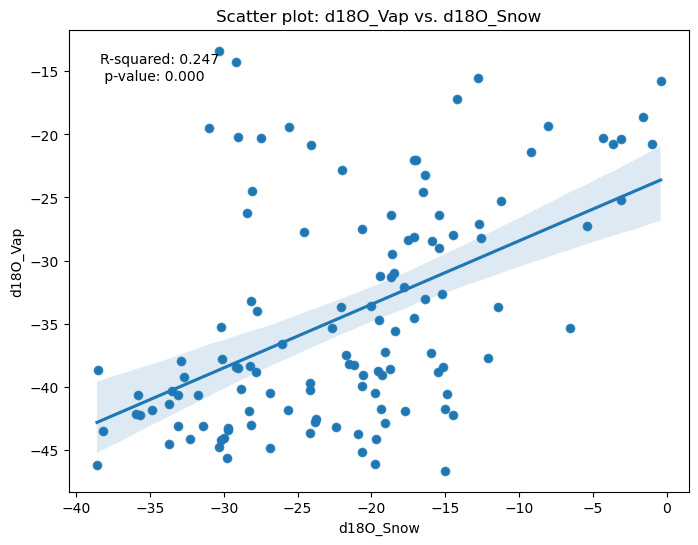

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Read the CSV file
csv_file = r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF/Daily_All.csv'
data = pd.read_csv(csv_file)

# Extract the columns of interest
x = data['d18O_Snow']
y = data['d18O_Vap']

# Plot the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x, y=y)

# Add regression line
sns.regplot(x=x, y=y)

# Calculate r-squared and p-value
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_squared = r_value ** 2

# Add r-squared and p-value to the plot
plt.text(0.05, 0.95, f'R-squared: {r_squared:.3f}\n p-value: {p_value:.3f}',
         ha='left', va='top', transform=plt.gca().transAxes)

# Set labels and title
plt.xlabel('d18O_Snow')
plt.ylabel('d18O_Vap')
plt.title('Scatter plot: d18O_Vap vs. d18O_Snow')

# Display the plot
plt.show()


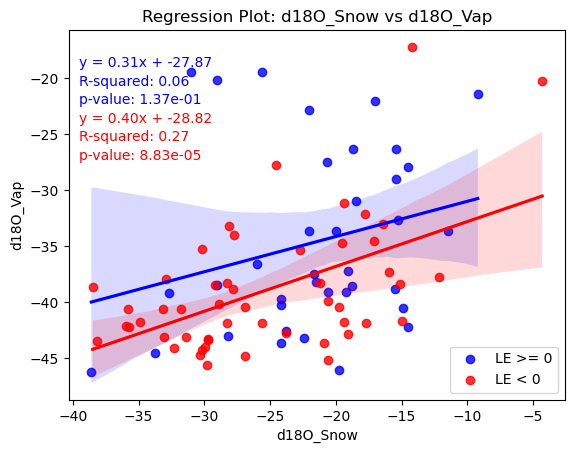

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF/Daily_All.csv')

# Filter the data based on 'Daily_Hl' >= 0
filtered_data_pos = data[data['Daily_Hl'] >= 0]

# Perform linear regression for positive 'Daily_Hl' data
slope_pos, intercept_pos, r_value_pos, p_value_pos, std_err_pos = stats.linregress(filtered_data_pos['d18O_Snow'], filtered_data_pos['d18O_Vap'])

# Get the color for positive 'Daily_Hl' data
color_pos = 'blue'

# Plot the regression line for positive 'Daily_Hl' data
sns.regplot(x='d18O_Snow', y='d18O_Vap', data=filtered_data_pos, scatter_kws={'color': color_pos}, line_kws={'color': color_pos}, label='LE >= 0')

# Filter the data based on 'Daily_Hl' < 0
filtered_data_neg = data[data['Daily_Hl'] < 0]

# Perform linear regression for negative 'Daily_Hl' data
slope_neg, intercept_neg, r_value_neg, p_value_neg, std_err_neg = stats.linregress(filtered_data_neg['d18O_Snow'], filtered_data_neg['d18O_Vap'])

# Get the color for negative 'Daily_Hl' data
color_neg = 'red'

# Plot the regression line for negative 'Daily_Hl' data
sns.regplot(x='d18O_Snow', y='d18O_Vap', data=filtered_data_neg, scatter_kws={'color': color_neg}, line_kws={'color': color_neg}, label='LE < 0')

# Set plot title and labels
plt.title('Regression Plot: d18O_Snow vs d18O_Vap')
plt.xlabel('d18O_Snow')
plt.ylabel('d18O_Vap')

# Add equation, r-squared, and p-value for positive 'Daily_Hl' data
eqn_pos = f'y = {slope_pos:.2f}x + {intercept_pos:.2f}'
r2_pos = f'R-squared: {r_value_pos**2:.2f}'
p_val_pos = f'p-value: {p_value_pos:.2e}'
plt.text(0.02, 0.9, eqn_pos, transform=plt.gca().transAxes, color=color_pos)
plt.text(0.02, 0.85, r2_pos, transform=plt.gca().transAxes, color=color_pos)
plt.text(0.02, 0.8, p_val_pos, transform=plt.gca().transAxes, color=color_pos)

# Add equation, r-squared, and p-value for negative 'Daily_Hl' data
eqn_neg = f'y = {slope_neg:.2f}x + {intercept_neg:.2f}'
r2_neg = f'R-squared: {r_value_neg**2:.2f}'
p_val_neg = f'p-value: {p_value_neg:.2e}'
plt.text(0.02, 0.75, eqn_neg, transform=plt.gca().transAxes, color=color_neg)
plt.text(0.02, 0.7, r2_neg, transform=plt.gca().transAxes, color=color_neg)
plt.text(0.02, 0.65, p_val_neg, transform=plt.gca().transAxes, color=color_neg)

# Add legend to the lower right corner
plt.legend(loc='lower right')

# Display the plot
plt.show()


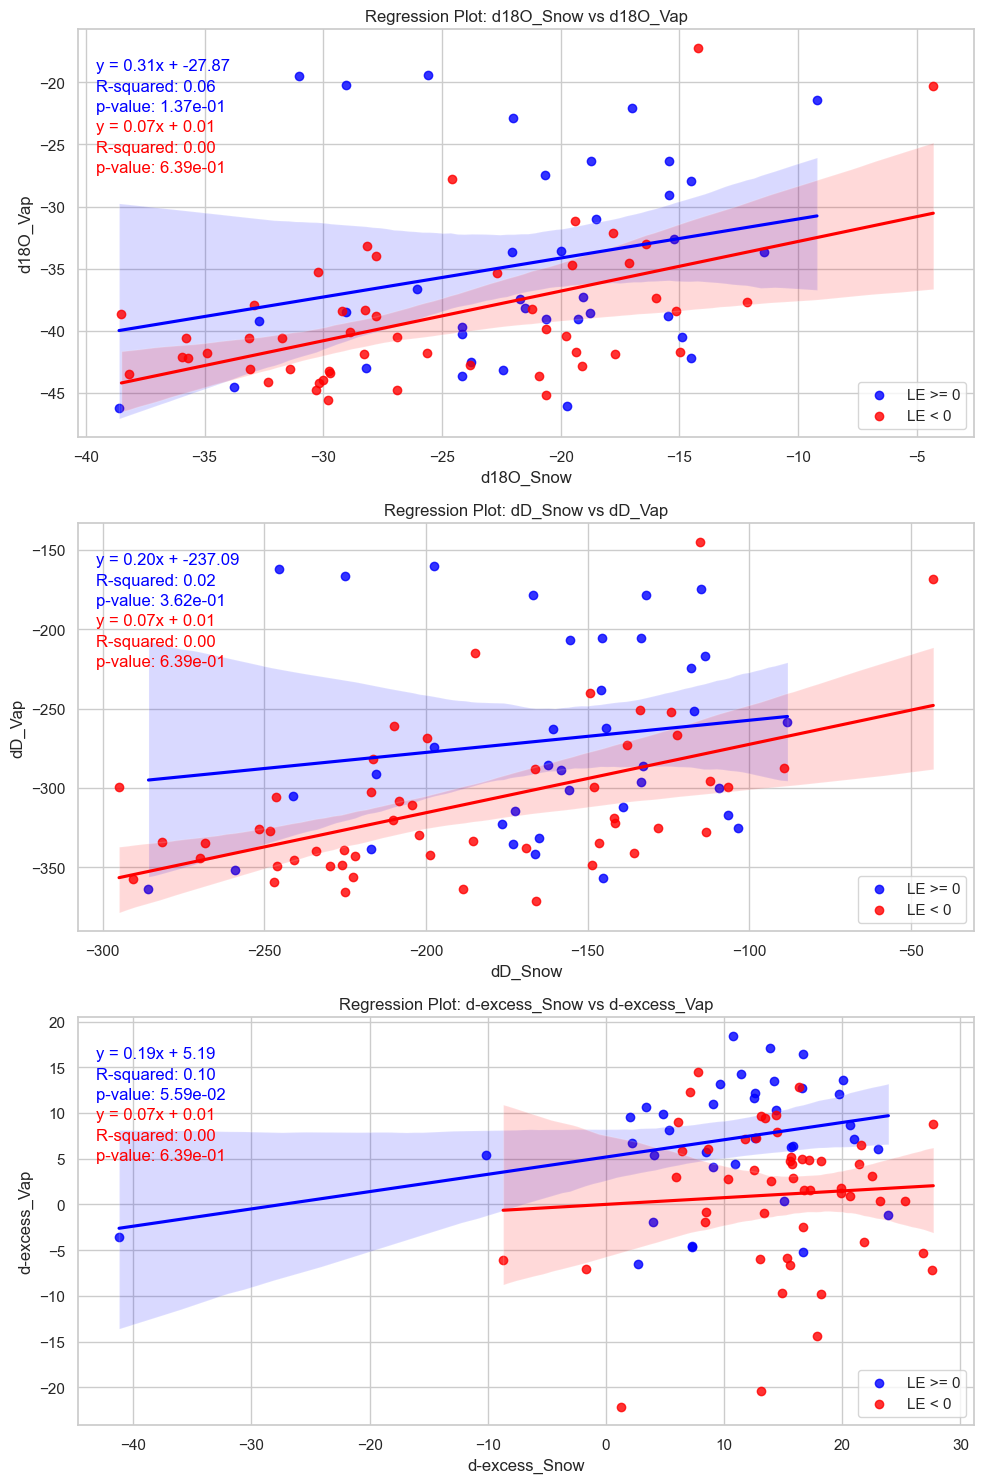

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF/Daily_All.csv')

# Filter the data based on 'Daily_Hl' >= 0
filtered_data_pos = data[data['Daily_Hl'] >= 0]

# Perform linear regression for positive 'Daily_Hl' data
slope_pos, intercept_pos, r_value_pos, p_value_pos, std_err_pos = stats.linregress(filtered_data_pos['d18O_Snow'], filtered_data_pos['d18O_Vap'])

# Get the color for positive 'Daily_Hl' data
color_pos = 'blue'

# Filter the data based on 'Daily_Hl' < 0 for d18O_Snow vs. d18O_Vap
filtered_data_neg = data[data['Daily_Hl'] < 0]

# Get the color for negative 'Daily_Hl' data for d18O_Snow vs. d18O_Vap
color_neg = 'red'

# Create a figure with three subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot d18O_Snow vs. d18O_Vap
ax1 = axes[0]
sns.regplot(x='d18O_Snow', y='d18O_Vap', data=filtered_data_pos, scatter_kws={'color': color_pos}, line_kws={'color': color_pos}, label='LE >= 0', ax=ax1)
sns.regplot(x='d18O_Snow', y='d18O_Vap', data=filtered_data_neg, scatter_kws={'color': color_neg}, line_kws={'color': color_neg}, label='LE < 0', ax=ax1)
ax1.set_title('Regression Plot: d18O_Snow vs d18O_Vap')
ax1.set_xlabel('d18O_Snow')
ax1.set_ylabel('d18O_Vap')
ax1.text(0.02, 0.9, f'y = {slope_pos:.2f}x + {intercept_pos:.2f}', transform=ax1.transAxes, color=color_pos)
ax1.text(0.02, 0.85, f'R-squared: {r_value_pos**2:.2f}', transform=ax1.transAxes, color=color_pos)
ax1.text(0.02, 0.8, f'p-value: {p_value_pos:.2e}', transform=ax1.transAxes, color=color_pos)
ax1.text(0.02, 0.75, f'y = {slope_neg:.2f}x + {intercept_neg:.2f}', transform=ax1.transAxes, color=color_neg)
ax1.text(0.02, 0.7, f'R-squared: {r_value_neg**2:.2f}', transform=ax1.transAxes, color=color_neg)
ax1.text(0.02, 0.65, f'p-value: {p_value_neg:.2e}', transform=ax1.transAxes, color=color_neg)
ax1.legend(loc='lower right')

# Perform linear regression for positive 'Daily_Hl' data for dD_Snow vs. dD_Vap
slope_pos, intercept_pos, r_value_pos, p_value_pos, std_err_pos = stats.linregress(filtered_data_pos['dD_Snow'], filtered_data_pos['dD_Vap'])

# Plot dD_Snow vs. dD_Vap
ax2 = axes[1]
sns.regplot(x='dD_Snow', y='dD_Vap', data=filtered_data_pos, scatter_kws={'color': color_pos}, line_kws={'color': color_pos}, label='LE >= 0', ax=ax2)
sns.regplot(x='dD_Snow', y='dD_Vap', data=filtered_data_neg, scatter_kws={'color': color_neg}, line_kws={'color': color_neg}, label='LE < 0', ax=ax2)
ax2.set_title('Regression Plot: dD_Snow vs dD_Vap')
ax2.set_xlabel('dD_Snow')
ax2.set_ylabel('dD_Vap')
ax2.text(0.02, 0.9, f'y = {slope_pos:.2f}x + {intercept_pos:.2f}', transform=ax2.transAxes, color=color_pos)
ax2.text(0.02, 0.85, f'R-squared: {r_value_pos**2:.2f}', transform=ax2.transAxes, color=color_pos)
ax2.text(0.02, 0.8, f'p-value: {p_value_pos:.2e}', transform=ax2.transAxes, color=color_pos)
ax2.text(0.02, 0.75, f'y = {slope_neg:.2f}x + {intercept_neg:.2f}', transform=ax2.transAxes, color=color_neg)
ax2.text(0.02, 0.7, f'R-squared: {r_value_neg**2:.2f}', transform=ax2.transAxes, color=color_neg)
ax2.text(0.02, 0.65, f'p-value: {p_value_neg:.2e}', transform=ax2.transAxes, color=color_neg)
ax2.legend(loc='lower right')

# Perform linear regression for positive 'Daily_Hl' data for d-excess_Snow vs. d-excess_Vap
slope_pos, intercept_pos, r_value_pos, p_value_pos, std_err_pos = stats.linregress(filtered_data_pos['d-excess_Snow'], filtered_data_pos['d-excess_Vap'])

# Plot d-excess_Snow vs. d-excess_Vap
ax3 = axes[2]
sns.regplot(x='d-excess_Snow', y='d-excess_Vap', data=filtered_data_pos, scatter_kws={'color': color_pos}, line_kws={'color': color_pos}, label='LE >= 0', ax=ax3)
sns.regplot(x='d-excess_Snow', y='d-excess_Vap', data=filtered_data_neg, scatter_kws={'color': color_neg}, line_kws={'color': color_neg}, label='LE < 0', ax=ax3)
ax3.set_title('Regression Plot: d-excess_Snow vs d-excess_Vap')
ax3.set_xlabel('d-excess_Snow')
ax3.set_ylabel('d-excess_Vap')
ax3.text(0.02, 0.9, f'y = {slope_pos:.2f}x + {intercept_pos:.2f}', transform=ax3.transAxes, color=color_pos)
ax3.text(0.02, 0.85, f'R-squared: {r_value_pos**2:.2f}', transform=ax3.transAxes, color=color_pos)
ax3.text(0.02, 0.8, f'p-value: {p_value_pos:.2e}', transform=ax3.transAxes, color=color_pos)
ax3.text(0.02, 0.75, f'y = {slope_neg:.2f}x + {intercept_neg:.2f}', transform=ax3.transAxes, color=color_neg)
ax3.text(0.02, 0.7, f'R-squared: {r_value_neg**2:.2f}', transform=ax3.transAxes, color=color_neg)
ax3.text(0.02, 0.65, f'p-value: {p_value_neg:.2e}', transform=ax3.transAxes, color=color_neg)
ax3.legend(loc='lower right')

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure as a JPEG file
fig.savefig(r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF\Snow_Vap_onetoone_1307.jpeg", dpi=300, bbox_inches='tight')

# Display the plots
plt.show()


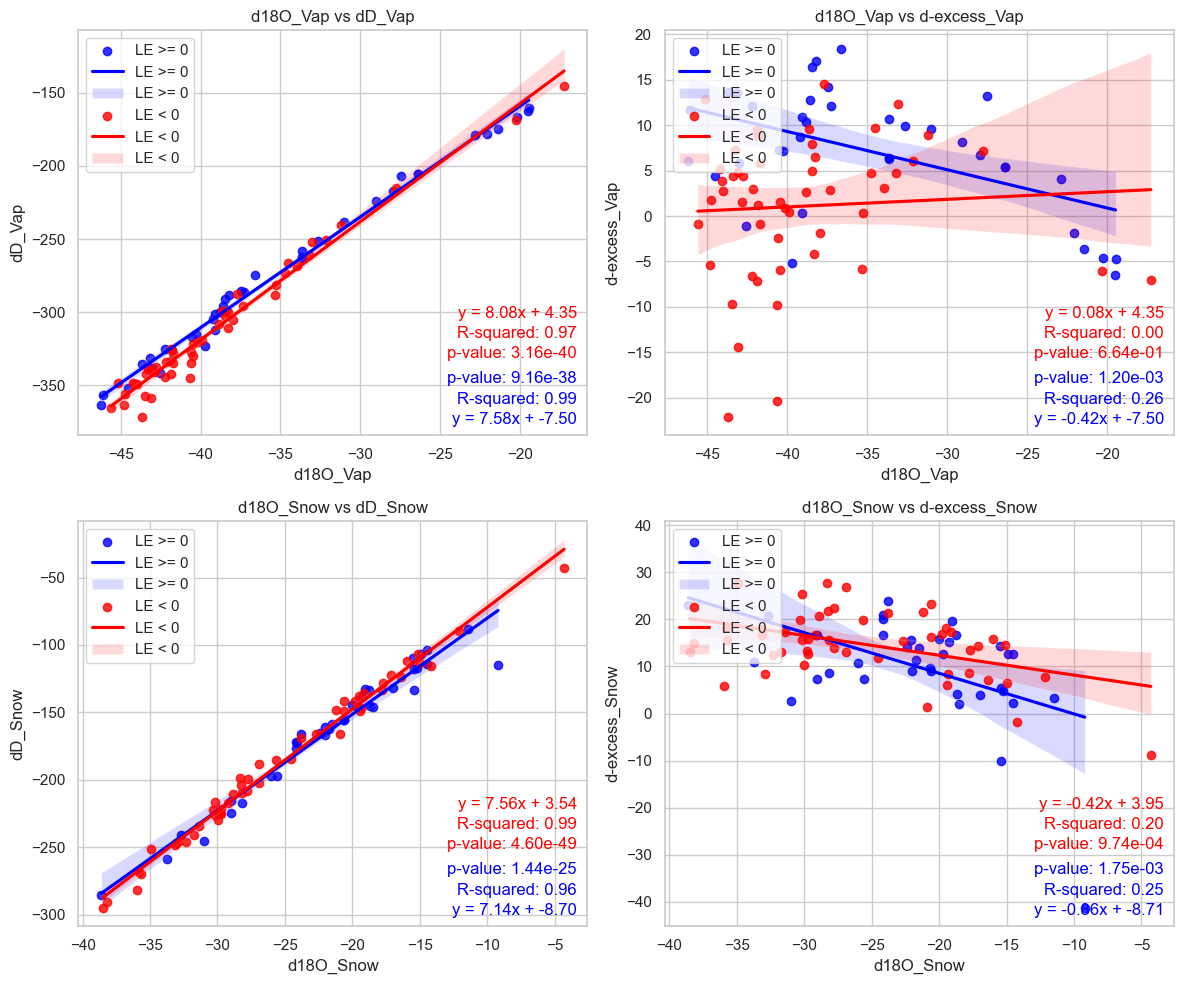

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(r'C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF/Daily_All.csv')

# Create a figure with two rows and two columns
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Define the column pairs for each plot
column_pairs = [('d18O_Vap', 'dD_Vap'), ('d18O_Vap', 'd-excess_Vap'), ('d18O_Snow', 'dD_Snow'), ('d18O_Snow', 'd-excess_Snow')]

# Define the colors for positive and negative 'Daily_Hl' data
colors = ['blue', 'red']

# Plot each pair of columns
for i, (col_x, col_y) in enumerate(column_pairs):
    # Filter the data based on 'Daily_Hl' >= 0
    filtered_data_pos = data[data['Daily_Hl'] >= 0]

    # Perform linear regression for positive 'Daily_Hl' data
    slope_pos, intercept_pos, r_value_pos, p_value_pos, std_err_pos = stats.linregress(filtered_data_pos[col_x], filtered_data_pos[col_y])

    # Plot positive 'Daily_Hl' data
    ax = axes[i // 2][i % 2]
    sns.regplot(x=col_x, y=col_y, data=filtered_data_pos, scatter_kws={'color': colors[0]}, line_kws={'color': colors[0]}, ax=ax)
    
    # Filter the data based on 'Daily_Hl' < 0
    filtered_data_neg = data[data['Daily_Hl'] < 0]

    # Perform linear regression for negative 'Daily_Hl' data
    slope_neg, intercept_neg, r_value_neg, p_value_neg, std_err_neg = stats.linregress(filtered_data_neg[col_x], filtered_data_neg[col_y])

    # Plot negative 'Daily_Hl' data
    sns.regplot(x=col_x, y=col_y, data=filtered_data_neg, scatter_kws={'color': colors[1]}, line_kws={'color': colors[1]}, ax=ax)

    # Set plot title and labels
    ax.set_title(f'{col_x} vs {col_y}')
    ax.set_xlabel(col_x)
    ax.set_ylabel(col_y)

    # Add equation, r-squared, and p-value for positive 'Daily_Hl' data
    ax.text(0.98, 0.02, f'y = {slope_pos:.2f}x + {intercept_pos:.2f}', transform=ax.transAxes, color=colors[0], ha='right', va='bottom')
    ax.text(0.98, 0.07, f'R-squared: {r_value_pos**2:.2f}', transform=ax.transAxes, color=colors[0], ha='right', va='bottom')
    ax.text(0.98, 0.12, f'p-value: {p_value_pos:.2e}', transform=ax.transAxes, color=colors[0], ha='right', va='bottom')

    # Add equation, r-squared, and p-value for negative 'Daily_Hl' data
    ax.text(0.98, 0.32, f'y = {slope_neg:.2f}x + {intercept_neg:.2f}', transform=ax.transAxes, color=colors[1], ha='right', va='top')
    ax.text(0.98, 0.27, f'R-squared: {r_value_neg**2:.2f}', transform=ax.transAxes, color=colors[1], ha='right', va='top')
    ax.text(0.98, 0.22, f'p-value: {p_value_neg:.2e}', transform=ax.transAxes, color=colors[1], ha='right', va='top')

    # Add legend for positive and negative 'Daily_Hl' data
    ax.legend(['LE >= 0', 'LE >= 0','LE >= 0','LE < 0', 'LE < 0','LE < 0'], loc='upper left')

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure as a JPEG file
fig.savefig(r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\LHF\Co-isotopes_1307.jpeg", dpi=300, bbox_inches='tight')

# Display the plots
plt.show()
